In [ ]:
# FFT Phase Correlation
> How to use RQ Decomposition to recover your camera's K, R and C matricies.

- toc: true 
- badges: true
- comments: true
- categories: [Computer Vision]
- image: images/2020-03-13-RQ-Decomposition-In-Practice/header.jpg


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io
from skimage import filters
from skimage.color import rgb2gray
from skimage.filters import window, difference_of_gaussians

import scipy 

plt.rcParams['figure.figsize'] = [10, 10]

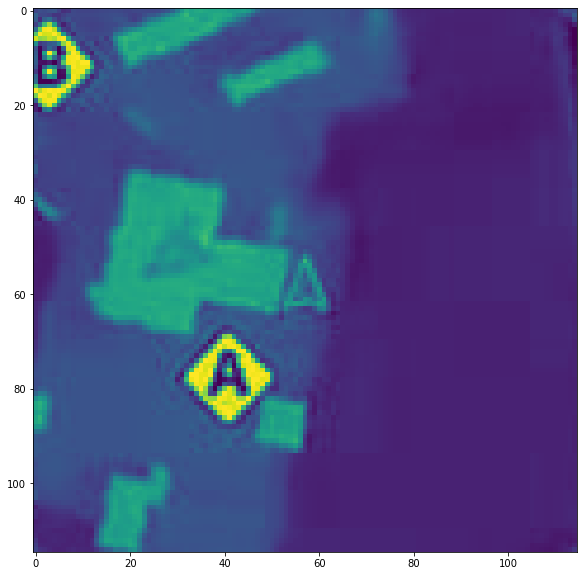

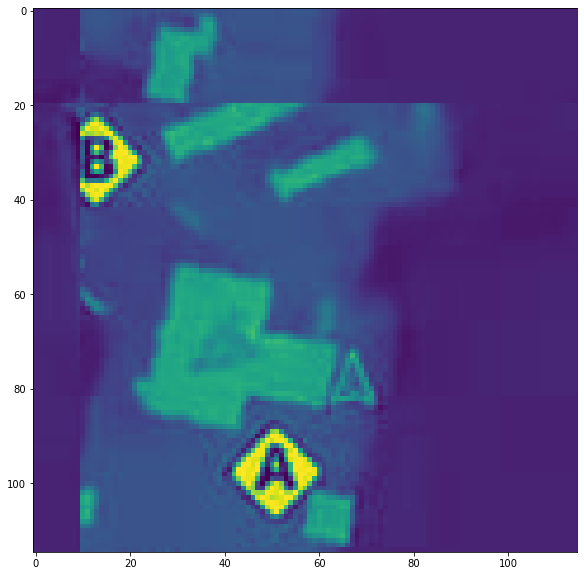

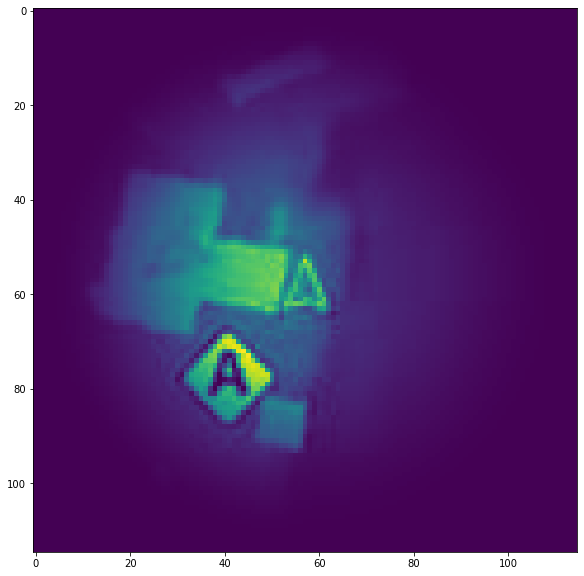

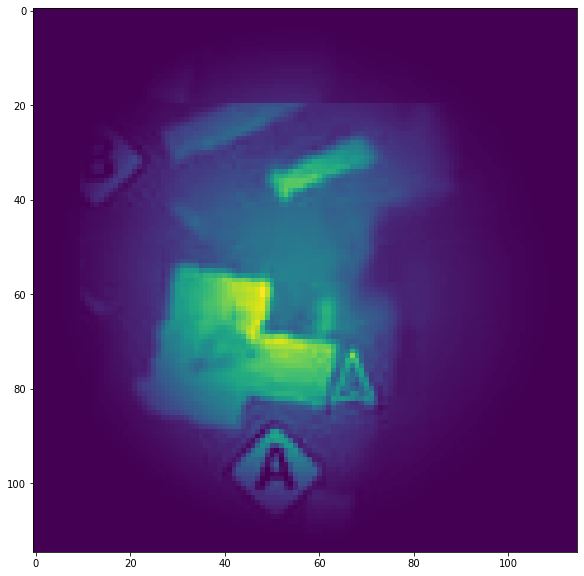

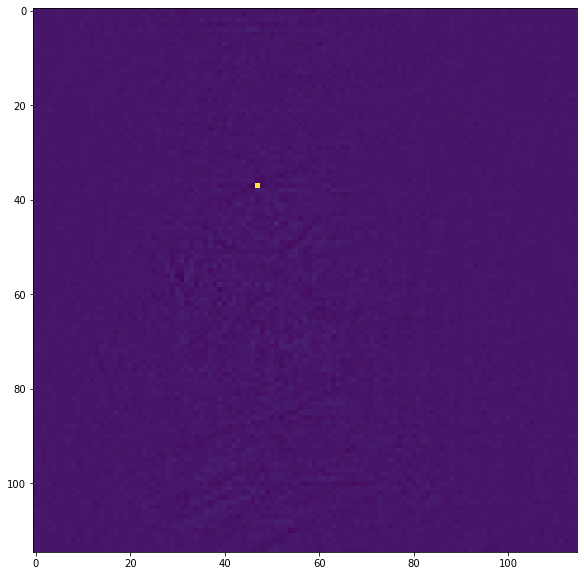

Shift inferred X:10,Y:20


In [2]:
frame = skimage.io.imread('Frame.jpg')
img1 = rgb2gray(frame[50:165,55:170,::-1])



shift_x = 10
shift_y = 20

result = scipy.ndimage.fourier_shift(np.fft.fft2(img1), shift=(shift_y,shift_x))
img2 = np.fft.ifft2(result).real

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()


# window images
img1_wimage = img1 * window('hann', img1.shape)
img2_wimage = img2 * window('hann', img2.shape)


plt.imshow(img1_wimage)
plt.show()

plt.imshow(img2_wimage)
plt.show()


img1_fs = np.fft.fft2(img1_wimage)
img2_fs = np.fft.fft2(img2_wimage)


cross_power_spectrum = (img1_fs*np.conjugate(img2_fs)) / np.abs(img1_fs*np.conjugate(img2_fs))

r = np.fft.ifft2(cross_power_spectrum).real

r = np.fft.fftshift(r)

plt.imshow(r)
plt.show()



[py,px] = np.argwhere(r==r.max())[0]

shift_x = 57 - px
shift_y = 57 - py

print(f'Shift inferred X:{shift_x},Y:{shift_y}')
    